In [1]:
# dependencies and constants
import os, csv
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
FILE_EXT_NUM = -14
FILE_EXT     = "_processed.csv"
DIR          = "../processed"

In [22]:
# create digraph
G = nx.DiGraph()

In [23]:
# add a node for each player
os.chdir(DIR)
for file in os.listdir():
    if file[-14:] == FILE_EXT: # ignore hidden files
        G.add_node(file[:FILE_EXT_NUM])

In [24]:
# add directed edges between players
for node in G.adj:
    with open(str(node + FILE_EXT), 'r') as file:
        for line in file.readlines():
            line = line.strip()
            for player in G.adj:
                if player == line and player != node:
                    G.add_edge(node, line)

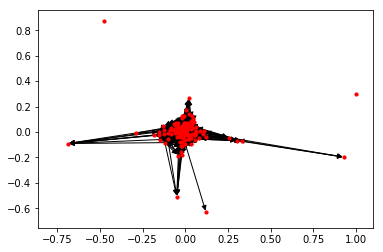

In [30]:
# print graph
nx.draw_networkx(G, with_labels=False, node_size=10)
plt.draw()
plt.show()